In [26]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
#loading dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science Eugene Pinsky/Stock Market/NVDA_mean_volatility_labels.csv")

In [3]:
df.head()

,Year,Week_Number,mean_return,volatility,Label
0,2017,1,0.28275,2.110070,undefined
1,2017,2,0.08460,2.299927,undefined
2,2017,3,0.15750,2.164153,undefined
3,2017,4,1.45160,0.704763,undefined
4,2017,5,0.48560,2.413944,undefined


Q1.

In [4]:
#getting data for year one
data_year_1 = df[df["Year"] == 2020]
#resetting index
data_year_1 = data_year_1.reset_index(drop=True)
data_year_1.head()

,Year,Week_Number,mean_return,volatility,Label
0,2020,0,0.1790,2.517300,green
1,2020,1,0.6902,0.443671,green
2,2020,2,0.4174,1.923896,green
3,2020,3,0.1240,1.014732,red
4,2020,4,-1.1110,3.027821,red


In [5]:
#splitting training data into features set X and label set y.
X_train = data_year_1[["mean_return","volatility"]]
y_train = data_year_1[["Label"]]

In [6]:
#dataframe to store values of K and accuracy to plot later.
results_q1 = pd.DataFrame(columns=["k_neighbors","accuracy_score"])

#iterating through different values of k = 3,5,7,9,11.
for i,k in enumerate(range(3,12,2)):

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred)
  results_q1.loc[i] = [int(k)] + [round(accuracy*100,2)]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [7]:
results_q1

,k_neighbors,accuracy_score
0,3.0,81.13
1,5.0,75.47
2,7.0,75.47
3,9.0,79.25
4,11.0,79.25


Plot of Accuracy vs K.

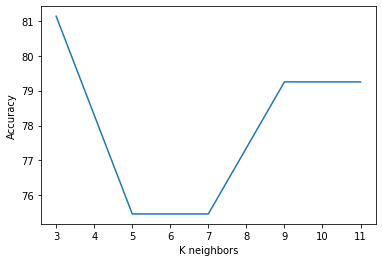

In [8]:
#plotting data
plt.plot(results_q1["k_neighbors"],results_q1["accuracy_score"])
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.show()

Q2.

In [9]:
#getting data for testing (year 2 - 2021)
data_year_2 = df[df["Year"] == 2021]
data_year_2 = data_year_2.reset_index(drop=True)
data_year_2.head()

,Year,Week_Number,mean_return,volatility,Label
0,2021,1,0.41060,4.264350,red
1,2021,2,-0.61780,2.158119,red
2,2021,3,1.63475,2.093428,red
3,2021,4,-1.06360,1.816845,red
4,2021,5,0.91560,1.281591,green


In [10]:
#splitting test data into features set X_test and label set y_test.
X_test = data_year_2[["Year","Week_Number","mean_return","volatility"]]
y_test = data_year_2[["Label"]]

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test[["mean_return","volatility"]])
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on  year 2 data is: "+str(round(accuracy*100,2)))

The accuracy on  year 2 data is: 67.31


Q3.

In [12]:
#simple confusion matrix
confusion_matrix(y_test,y_pred)

array([[18,  4],
       [13, 17]])

In [13]:
#getting values by using ravel method on confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [14]:
print("Confusion Matrix for prediction on Year 2 data (2021)")

print(" -----------------------------------")
print("|\t   |Positive\t| Negative"+"  |")
print("|-----------------------------------|")
print("| Positive |   " + str(tp)+" (TP)\t|   "+str(fn)+" (FN) |")
print("|-----------------------------------|")
print("| Negative |   " + str(fp)+"  (FP)\t|   "+str(tn)+" (TN) |")
print(" -----------------------------------")


Confusion Matrix for prediction on Year 2 data (2021)
 -----------------------------------
|	   |Positive	| Negative  |
|-----------------------------------|
| Positive |   17 (TP)	|   13 (FN) |
|-----------------------------------|
| Negative |   4  (FP)	|   18 (TN) |
 -----------------------------------


Q4.

In [15]:
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
print("The true positive rate or sensitivity: " +str(round(TPR*100,2)))
print("The true negative rate or specificity: " +str(round(TNR*100,2)))

The true positive rate or sensitivity: 56.67
The true negative rate or specificity: 81.82


Q5.

Getting data for year 2 (2021).

In [16]:
#NVDA daily data to implement trading strategy on.
df = pd.read_csv("/content/drive/MyDrive/Data Science Eugene Pinsky/Stock Market/NVDA_with_labels.csv")
df_2021 = df[ df["Year"] == 2021 ]
df_2021 = df_2021.reset_index(drop=True)
df_2021.head(3)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,Label
0,2021-01-04 00:00:00-05:00,2021,1,4,Monday,1,2021-01,131.04,136.52,129.62,131.13,56064000,130.93,0.004481,131.436429,132.4336,red
1,2021-01-05 00:00:00-05:00,2021,1,5,Tuesday,1,2021-01,131.00,134.43,130.87,134.05,32276000,133.84,0.022210,131.505000,132.4432,red
2,2021-01-06 00:00:00-05:00,2021,1,6,Wednesday,1,2021-01,132.23,132.45,125.86,126.14,58042400,125.95,-0.058953,130.972857,132.2492,red


**Buy and hold trading strategy**

In [17]:
#function to carry out inertia trading strategy
def buy_and_hold(df,principal,end):

    #quantity of shares bought at opening price
    shares_bought = 0

    #amount gained by selling stock at closing price
    amount_gained = 0

    #value achieved from selling stocks at closing price at the end of given period.
    capital = 0 

    #buying stocks at start opening price at the start of the year.
    shares_bought = principal/df["Open"][0]

    #selling stock at its closing price
    capital = shares_bought * df["Close"][end]

    return capital

In [18]:
capital = buy_and_hold(df_2021,100,len(df_2021)-1)
print("The capital from investing 100 dollars in buy and hold is as follows: " + str(round(capital,2)))

The capital from investing 100 dollars in buy and hold is as follows: 225.78


**My trading strategy**

Combining predicted labels from KNN for year 2 with Daily data for year 2.

First combining labels with weekly data for year 2.

In [19]:
X_test.head(3)

,Year,Week_Number,mean_return,volatility
0,2021,1,0.41060,4.264350
1,2021,2,-0.61780,2.158119
2,2021,3,1.63475,2.093428


In [20]:
#appending predicted labels from KNN model to test data (year 2).
X_test_new = pd.concat([X_test,pd.DataFrame(y_pred)],axis=1)
X_test_new = X_test_new.rename(columns={0:"Label"})
X_test_new.head(3)

,Year,Week_Number,mean_return,volatility,Label
0,2021,1,0.41060,4.264350,green
1,2021,2,-0.61780,2.158119,red
2,2021,3,1.63475,2.093428,green


dropping label columns for year 2 data.

In [21]:
df_2021 = df_2021.drop(columns=["Label"])
df_2021.head(3)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2021-01-04 00:00:00-05:00,2021,1,4,Monday,1,2021-01,131.04,136.52,129.62,131.13,56064000,130.93,0.004481,131.436429,132.4336
1,2021-01-05 00:00:00-05:00,2021,1,5,Tuesday,1,2021-01,131.00,134.43,130.87,134.05,32276000,133.84,0.022210,131.505000,132.4432
2,2021-01-06 00:00:00-05:00,2021,1,6,Wednesday,1,2021-01,132.23,132.45,125.86,126.14,58042400,125.95,-0.058953,130.972857,132.2492


Merging predicted labels to daily stock data for year 2.

In [22]:
df_2021 = pd.merge(df_2021,X_test_new[["Week_Number","Label"]],on="Week_Number")
df_2021.head(3)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,Label
0,2021-01-04 00:00:00-05:00,2021,1,4,Monday,1,2021-01,131.04,136.52,129.62,131.13,56064000,130.93,0.004481,131.436429,132.4336,green
1,2021-01-05 00:00:00-05:00,2021,1,5,Tuesday,1,2021-01,131.00,134.43,130.87,134.05,32276000,133.84,0.022210,131.505000,132.4432,green
2,2021-01-06 00:00:00-05:00,2021,1,6,Wednesday,1,2021-01,132.23,132.45,125.86,126.14,58042400,125.95,-0.058953,130.972857,132.2492,green


In [23]:
#function to carry out buy with label weekly trading strategy
def buy_with_labels(df,end):

  #cash amount initially used to invest in stock market
  initial_cash = 100

  #quantity of shares bought at opening price
  shares_bought = 0

  #amount gained by selling stock at adjusted closing price
  amount_gained = 0

  #value achieved from selling stocks at closing price at the end of given period.
  capital = 0 

  #boolean variable to determine if . 
  invested = False

  #iterating through dataframe
  for index,row in df.iterrows():
 
   #Finding first green week or green week after a red week ,and we dont have a position in market yet.
    if df["Label"][index] == "green" and invested ==False :
      
      #buying shares equal to the amount of cash we hold currently 
      shares_bought = initial_cash / df["Open"][index]
      
      #as we have bought shares equal in evaluation to our cash initial cash = 0
      initial_cash = 0

      #we have a position in the market
      invested = True

    #Finding red week where we dont have a position
    elif df["Label"][index] == "red" and invested ==False :
      
      #we do nothing
      continue

    #conditions if we have put money in the market

    #check to see we are not at the last day of trading.
    if index!= end:

      #if next week is red and current week is green
      if invested == True and df["Label"][index] == "green" and df["Label"][index+1] == "red":

        #selling stock at adjusted closing price at the end of the week
        initial_cash += df["Adj Close"][index] * shares_bought
        
        #all shares are sold
        shares_bought = 0
        
        #we are no longer invested in the market.
        invested = False

      #if current week is green and (next week/next day) is green 
      elif invested == True and df["Label"][index] == "green" and df["Label"][index+1] == "green":

        #do nothing
        continue

    #if we end our trading period while being invested in the market
    if index == end and invested == True:
        
        #selling stock at adjusted closing price at the end of the week
        initial_cash += df["Adj Close"][index] * shares_bought
        
        #all shares are sold
        shares_bought = 0

        #we are no longer invested in the market.
        invested = False
  
  #returning the updated cash
  return initial_cash

In [24]:
#return on investment
roi = buy_with_labels(df_2021,len(df_2021)-1)
print("The cash with us after investing using buy with labels strategy is: "+str(round(roi,2)))

The cash with us after investing using buy with labels strategy is: 394.92
